In [72]:
import os

import pandas as pd
from dotenv import load_dotenv
from IPython.display import HTML, display
from supabase import create_client

load_dotenv()

True

https://supabase.com/docs/reference/python/introduction

In [73]:
def show(res):
    df = pd.DataFrame(res.dict()["data"])
    display(HTML(df.to_html(index=False)))

## Connect to supabase

In [74]:
supabase_url = os.getenv("SUPABASE_URL")
supabase_key = os.getenv("SUPABASE_KEY")

In [75]:
client = create_client(supabase_url, supabase_key)

## Fetching data

In [76]:
show(client.table("users").select("*").execute())  # test data created using claude

id,user_name,email,password,created_at,address,mobile_phone
4,Walter_White,heisenberg@gmail.com,crystal123,2023-01-15T00:00:00+00:00,308 Negra Arroyo Lane Albuquerque NM,505-555-1234
5,Daenerys_Targaryen,mother_of_dragons@hotmail.com,dr@carys!,2023-02-28T00:00:00+00:00,1 Dragonstone Castle Westeros,123-456-7890
6,Sherlock_Holmes,detective@bakerstreet.co.uk,elementary2023,2023-03-10T00:00:00+00:00,221B Baker Street London,020-7946-0342
7,Leslie_Knope,parks_director@pawneegov.com,waffles4ever,2023-04-22T00:00:00+00:00,123 Main Street Pawnee IN,812-555-0126
8,Tony_Stark,ironman@starkindustries.com,jarvis3000,2023-05-05T00:00:00+00:00,10880 Malibu Point Malibu CA,310-555-7890
9,Eleven,eleven@strangerthings.net,eggos11,2023-06-18T00:00:00+00:00,Hawkins National Laboratory IN,219-555-1983
10,Michael_Scott,worlds_best_boss@dundermifflin.com,thatswhatshesaid,2023-07-30T00:00:00+00:00,1725 Slough Avenue Scranton PA,570-555-2424
11,Katniss_Everdeen,mockingjay@district12.gov,peeta<3,2023-08-14T00:00:00+00:00,Victor's Village District 12 Panem,012-345-6789
12,Rick_Sanchez,rickc137@interdimensional.com,wubbalubbadubdub,2023-09-27T00:00:00+00:00,123 Unknown Street Seattle WA,206-555-1234
13,Hermione_Granger,brightest_witch@hogwarts.edu,wingardiumleviosa,2023-10-31T00:00:00+00:00,Gryffindor Tower Hogwarts Scotland,+44-7700-900077


In [77]:
show(
    client.table("users")
    .select("user_name, email, password")
    .eq("user_name", "Michael_Scott")
    .execute()
)

user_name,email,password
Michael_Scott,worlds_best_boss@dundermifflin.com,thatswhatshesaid


## Transactions table and foreign keys

In [78]:
show(client.table("transactions").select("*").execute())

no data fetched because RLS policy is not set

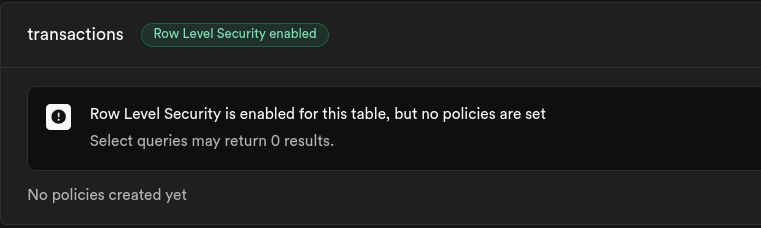


below result after setting `Enable read access for all users`  

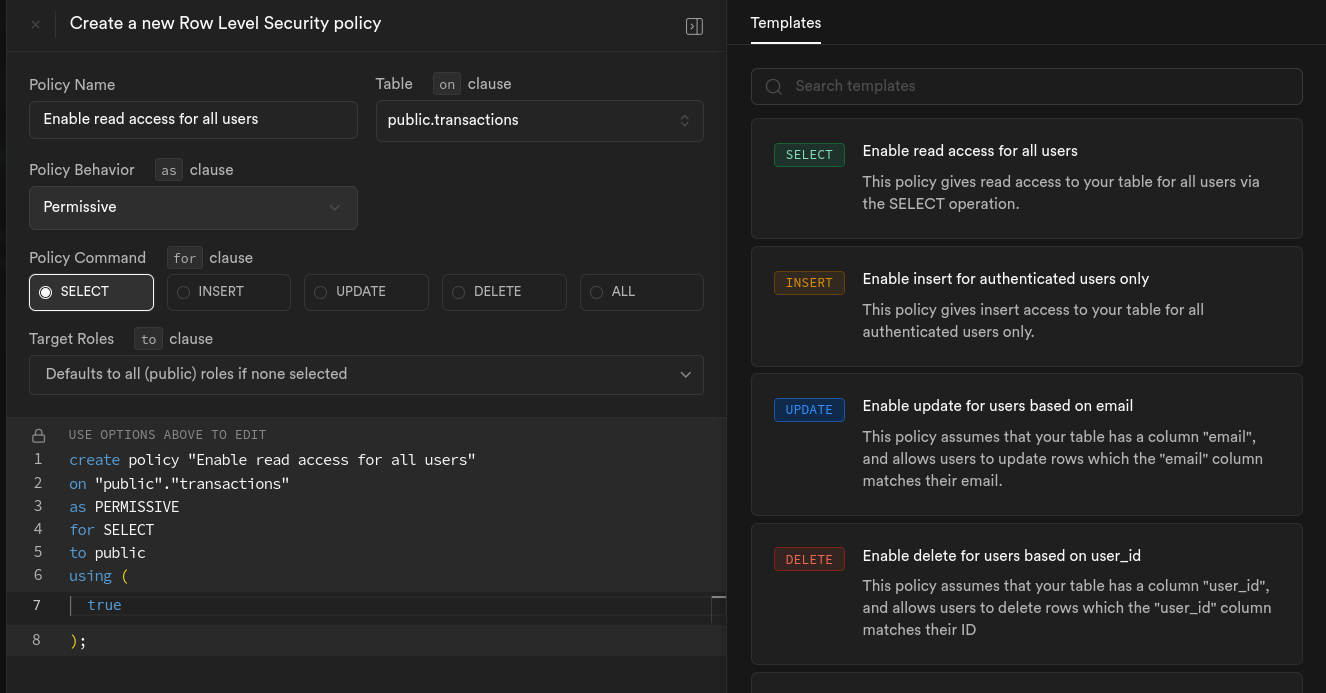

In [79]:
show(client.table("transactions").select("*").execute())

id,user_id,amount,created_at
1,7,250.50,2024-08-23T21:44:11.804655+00:00
2,11,75.99,2024-08-23T21:44:11.804655+00:00
3,4,1000.00,2024-08-23T21:44:11.804655+00:00
4,13,42.75,2024-08-23T21:44:11.804655+00:00
5,9,350.25,2024-08-23T21:44:11.804655+00:00
7,8,250.50,2024-08-23T22:05:46.491518+00:00
8,11,75.99,2024-08-23T22:05:46.491518+00:00
9,4,2000.00,2024-08-23T22:05:46.491518+00:00
10,13,42.75,2024-08-23T22:05:46.491518+00:00
11,4,350.25,2024-08-23T22:05:46.491518+00:00


## Join SQL statements

In [80]:
res = (
    client.table("users")
    .select("id, user_name, transactions(amount)")
    .eq("user_name", "Walter_White")
    .execute()
)

In [81]:
show(res)

id,user_name,transactions
4,Walter_White,"[{'amount': 1000}, {'amount': 2000}, {'amount': 350.25}]"


In [82]:
if res.data:
    data = res.data[0]

    user_id = data["id"]
    user_name = data["user_name"]
    transaction_sum = (
        sum(i["amount"] for i in data["transactions"]) if data["transactions"] else 0
    )

    print(f"User ID: {user_id}")
    print(f"User Name: {user_name}")
    print(f"Total Transaction Amount: ${transaction_sum:.2f}")
else:
    print("No results found")

User ID: 4
User Name: Walter_White
Total Transaction Amount: $3350.25


## Updating records

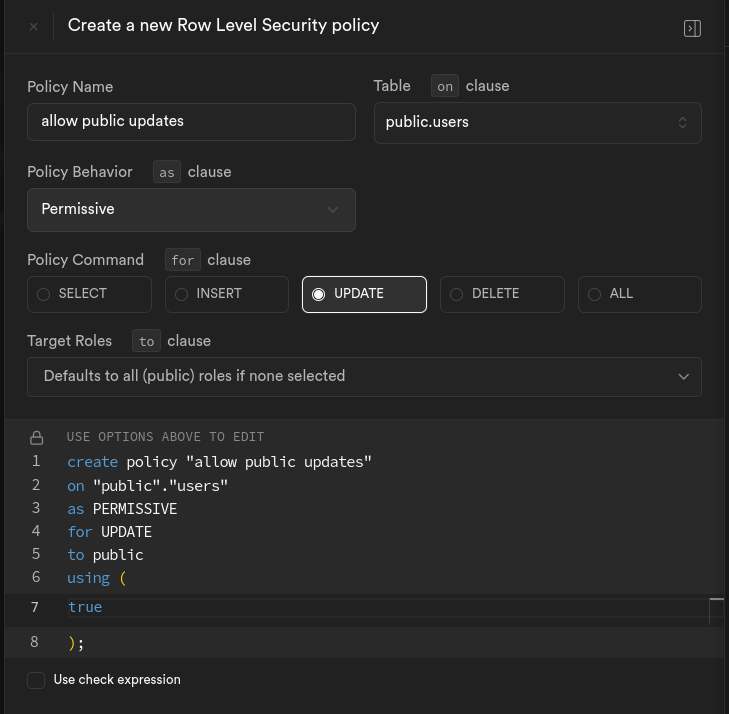

In [87]:
show(
    client.table("users")
    .update({"email": "strongest_avenger@starkindustries.com"})
    .eq("id", 8)
    .execute()
)

id,user_name,email,password,created_at,address,mobile_phone
8,Tony_Stark,strongest_avenger@starkindustries.com,jarvis3000,2023-05-05T00:00:00+00:00,10880 Malibu Point Malibu CA,310-555-7890


In [88]:
show(client.table("users").select("user_name, email, password").eq("id", 8).execute())

user_name,email,password
Tony_Stark,strongest_avenger@starkindustries.com,jarvis3000


## Upsert

In [109]:
data = {
    "user_name": "Homer_Simpson",
    "email": "donut_lover@springfield.com",
    "password": "mmm..donuts",
    "created_at": "2023-12-01",
    "address": "742 Evergreen Terrace Springfield",
    "mobile_phone": "939-555-0113",
}

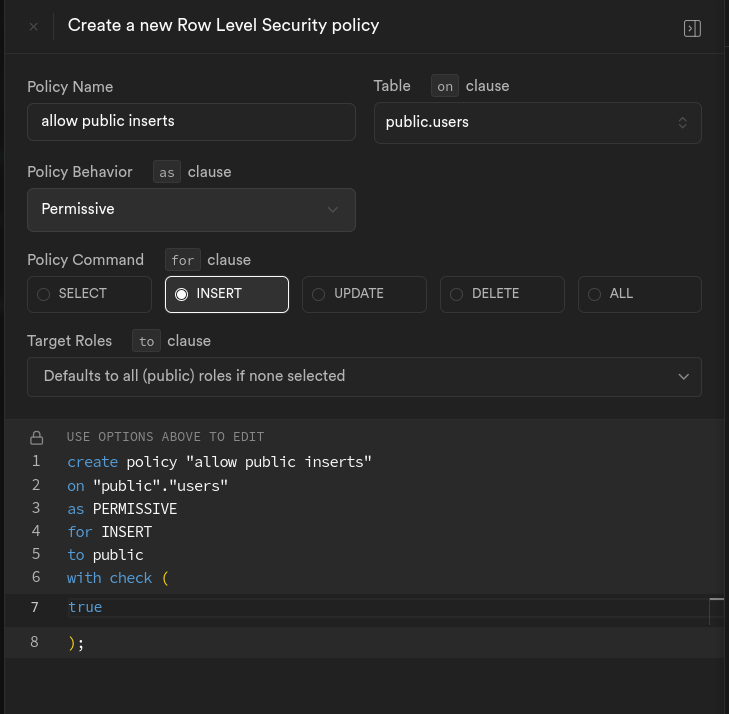

In [110]:
show(client.table("users").upsert(data).execute())

id,user_name,email,password,created_at,address,mobile_phone
19,Homer_Simpson,donut_lover@springfield.com,mmm..donuts,2023-12-01T00:00:00+00:00,742 Evergreen Terrace Springfield,939-555-0113


## Deleting records

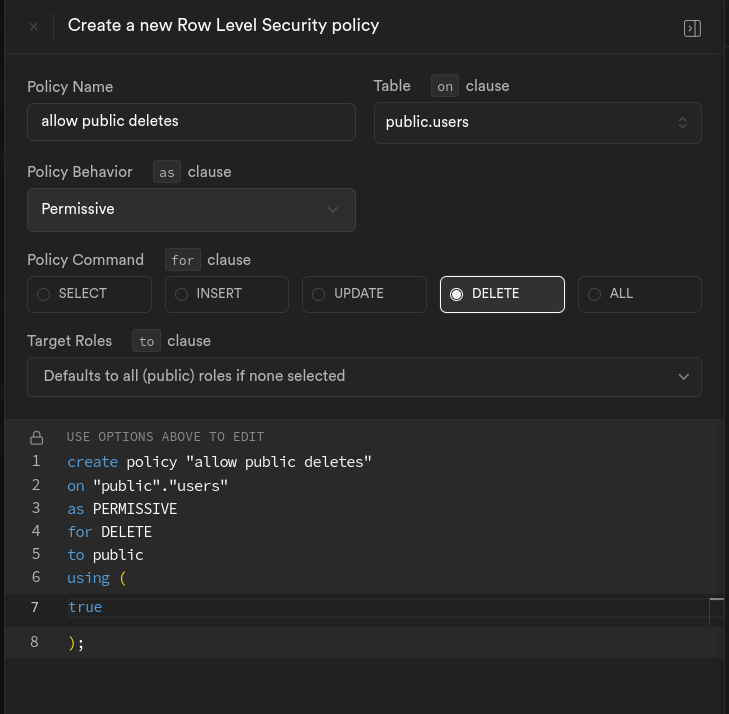

In [113]:
show(client.table("users").delete().eq("id", 10).execute())

id,user_name,email,password,created_at,address,mobile_phone
10,Michael_Scott,worlds_best_boss@dundermifflin.com,thatswhatshesaid,2023-07-30T00:00:00+00:00,1725 Slough Avenue Scranton PA,570-555-2424


These are all RLS policies applied so far:

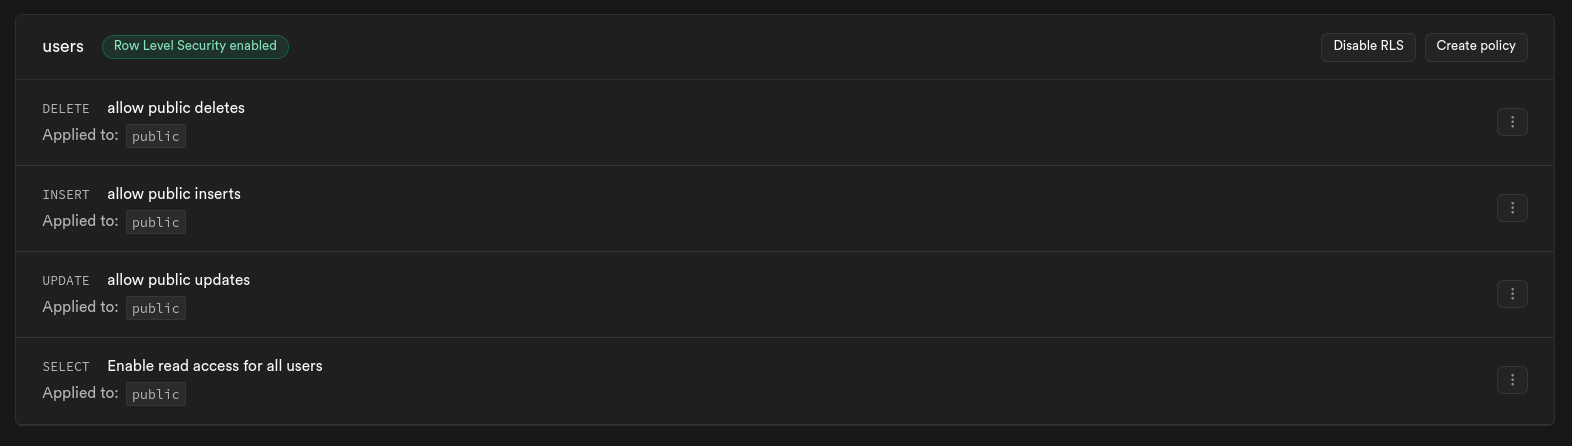

deleting multiple records

In [115]:
show(client.table("users").delete().in_("id", [12, 19]).execute())

id,user_name,email,password,created_at,address,mobile_phone
12,Rick_Sanchez,rickc137@interdimensional.com,wubbalubbadubdub,2023-09-27T00:00:00+00:00,123 Unknown Street Seattle WA,206-555-1234
19,Homer_Simpson,donut_lover@springfield.com,mmm..donuts,2023-12-01T00:00:00+00:00,742 Evergreen Terrace Springfield,939-555-0113


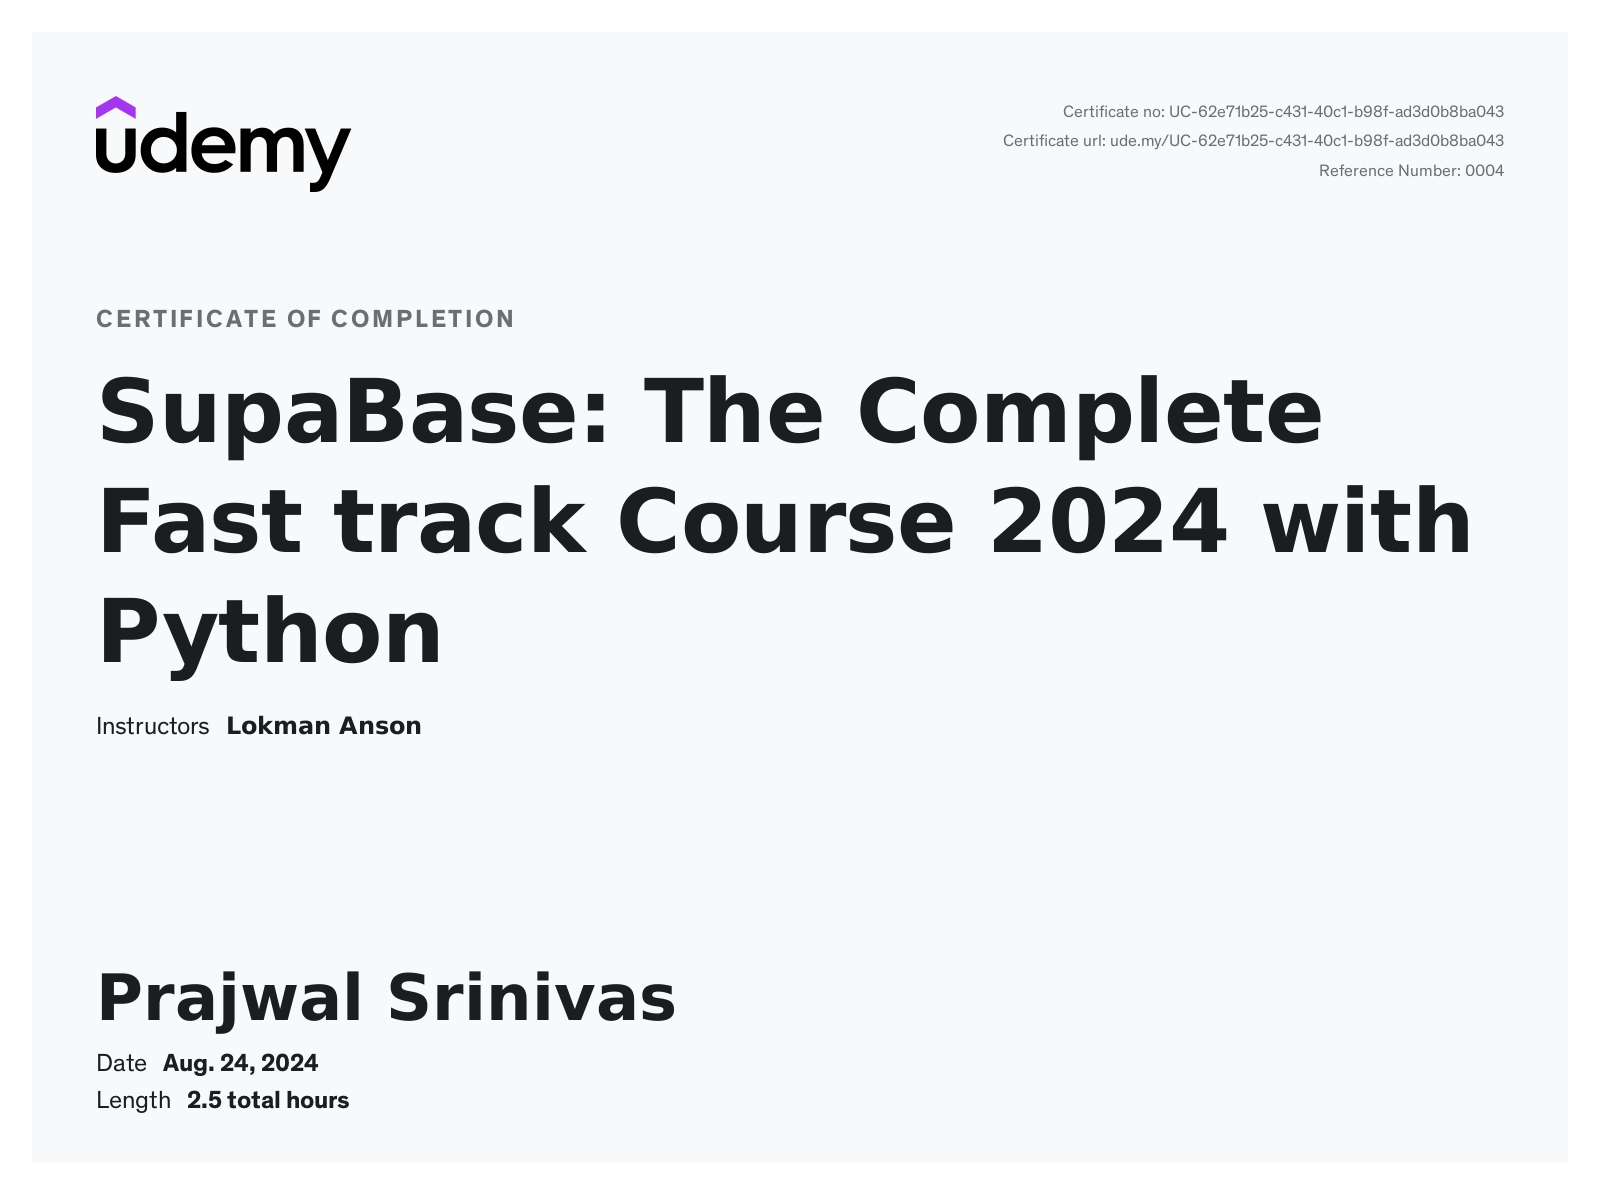